## Solution for Problems 3.b and 3.c on Homework 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Read data and transform into numpy arrays. We will also add the 1's in the $x_0$ position.

In [2]:
df_X = pd.read_csv('data/x.txt', sep='\ +', names=["x1","x2"], header=None, engine='python')
df_y = pd.read_csv('data/y.txt', sep='\ +', names=["y"], header=None, engine='python')
df_y = df_y.astype(int)
X = np.hstack([np.ones((df_X.shape[0], 1)), df_X.values])
y = df_y["y"].values
X[:5,:], y[:5]

(array([[ 1.        ,  1.3432504 , -1.3311479 ],
        [ 1.        ,  1.8205529 , -0.6346681 ],
        [ 1.        ,  0.98632067, -1.8885762 ],
        [ 1.        ,  1.9443734 , -1.635452  ],
        [ 1.        ,  0.97673352, -1.3533151 ]]),
 array([-1, -1, -1, -1, -1]))

Define the necessary functions for computing the Hessian, the gradient, and finding $\theta$ via Newton's method, i.e.

$$\theta:=\theta-H^{-1}\nabla_\theta J(\theta).$$

In [3]:
def sigmoid(X):
    return 1/(1+np.exp(-X))

def gradient(theta, X, y):
    z = y * X.dot(theta)
    g = -np.mean((1.0-sigmoid(z)) * y * X.T, axis=1)
    return g

def loss(theta, X, y):
    z = y * X.dot(theta)
    l = np.mean(np.log(1.0 + np.exp(-z)))
    return l

def hessian(theta, X, y):
    m = X.shape[1]
    h = np.zeros((m, m))
    z = y * X.dot(theta)
    for i in range(m):
        for j in range(m):
            if i <= j: # take advantage of symmetry
                h[i][j] = h[j][i] = np.mean(sigmoid(z) * (1 - sigmoid(z)) * X[:,i] * X[:,j])
    return h

def newton(theta0, X, y, eps=1e-6):
    theta = theta0
    delta = 1
    losses = []
    while delta > eps:
        last_theta = theta.copy()
        H = hessian(theta, X, y)
        g = gradient(theta, X, y)
        l = loss(theta, X, y)
        losses.append(l)
        theta -= np.linalg.inv(H).dot(g)
        delta = np.linalg.norm(theta - last_theta, ord=1)
    return theta, losses

Compute the best parameters.

In [4]:
theta0 = np.zeros(X.shape[1])
theta, losses = newton(theta0, X, y)
theta

array([-2.6205116 ,  0.76037154,  1.17194674])

Plot the points and the decision boundary.

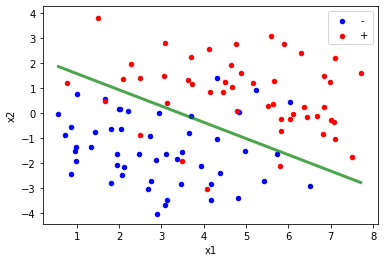

In [5]:
# Add y to the X dataframe
df_X["y"] = y
# Plot points
ax1 = df_X[y == -1].plot(kind='scatter', x='x1', y='x2', color='b', label='-')
ax2 = df_X[y == 1].plot(kind='scatter', x='x1', y='x2', color='r', label='+', ax=ax1)
# get points to plot on the decision boundary
x = np.linspace(df_X["x1"].min(), df_X["x1"].max(), 2)
# Plot decision boundary
plt.plot(x,(-x*theta[1]-theta[0])/theta[2], color="green", linewidth=3, alpha=0.7)
plt.show()

Plot the losses.

Text(0, 0.5, '$J(\\theta)$')

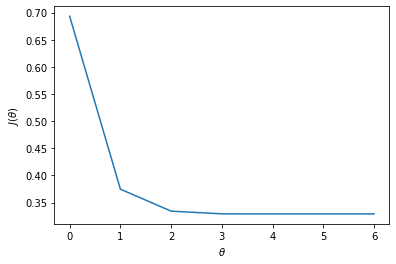

In [6]:
ax1 = plt.plot(losses)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$J(\theta)$')